In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tensorflow as tf

sys.path.append('../')
import dataset_loaders
import neural_networks.feed_forward_neural_network as ffnn
import compression.run_compression

In [2]:
# load in dataset
dataset_filepath = '../../data/datasets/debug.jld'
data = dataset_loaders.risk_dataset_loader(dataset_filepath, normalize=True)
viz_data = dataset_loaders.risk_dataset_loader(dataset_filepath, normalize=False)

In [3]:
# recover network and predict values for the validation set
network_filepath = '../../data/snapshots/test.weights'
tf.python.reset_default_graph()
FLAGS = compression.run_compression.FLAGS
FLAGS._parse_flags()
with tf.Session() as session:
    network = ffnn.FeedForwardNeuralNetwork(session, FLAGS)
    saver = tf.train.Saver()
    saver.restore(session, network_filepath)
    pred = network.predict(data['x_val'])

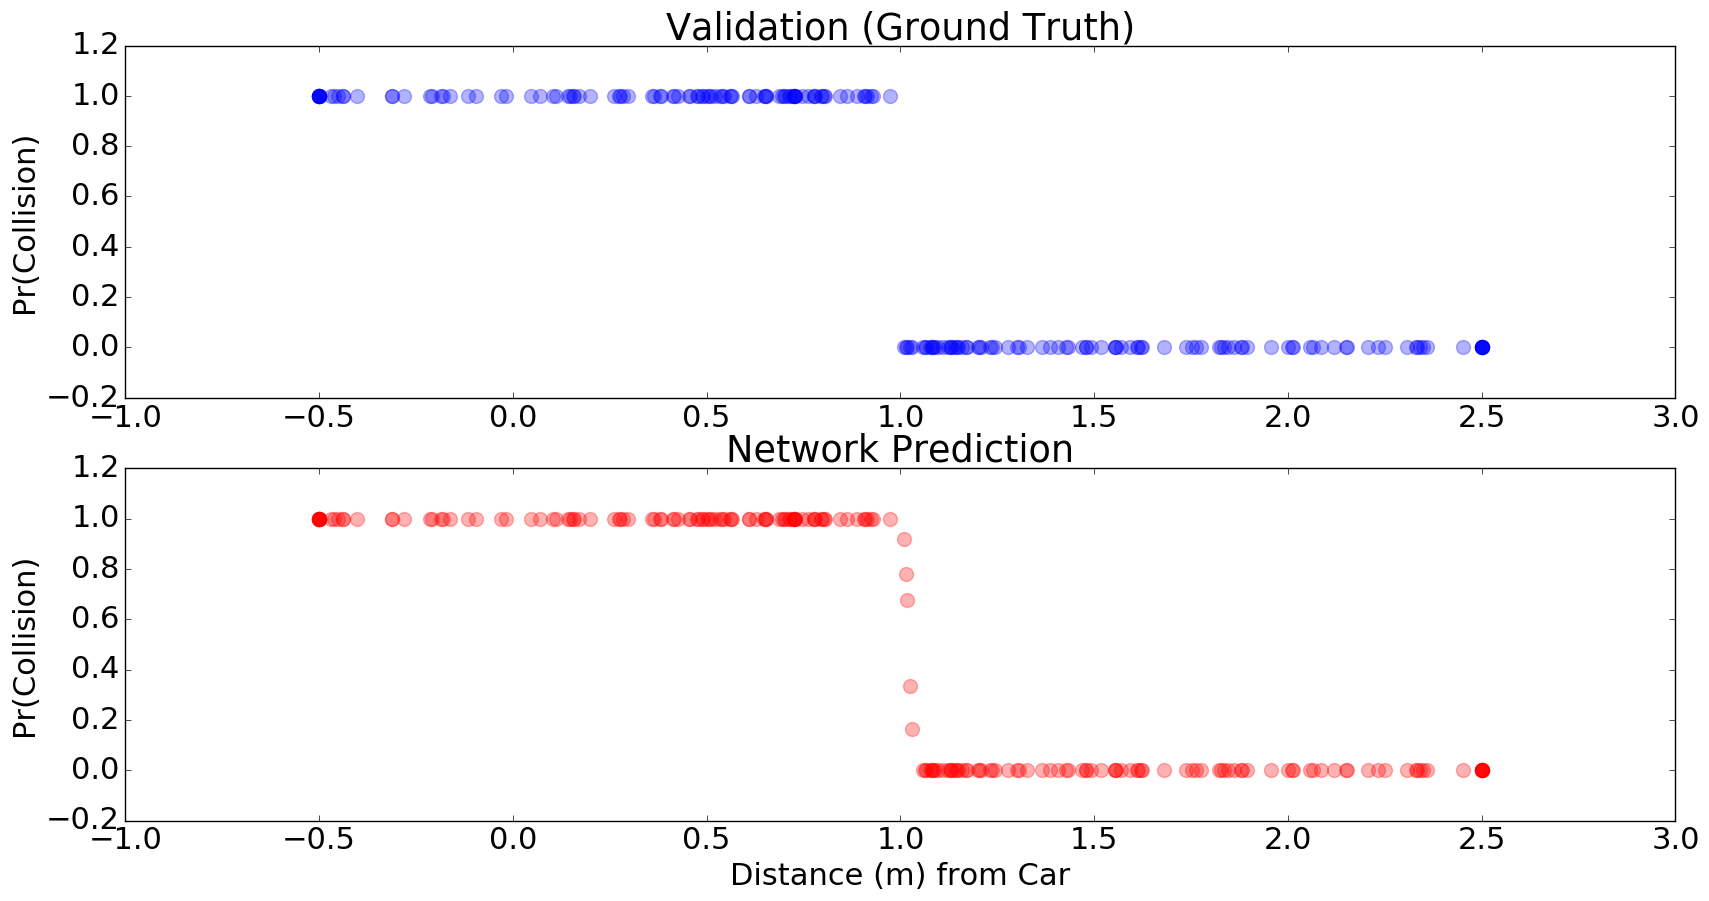

In [4]:
# plot predictions vs true values
plt.figure(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 22})
plt.figure(1)
plt.subplot(211)
plt.subplot(211).set_title('Validation (Ground Truth)')
plt.scatter(viz_data['x_val'], viz_data['y_val'], color='blue', s=100, alpha=.3)
plt.ylabel('Pr(Collision)')

plt.subplot(212)
plt.subplot(212).set_title('Network Prediction')
plt.scatter(viz_data['x_val'], pred, color='red', s=100, alpha=.3)

plt.xlabel('Distance (m) from Car')
plt.ylabel('Pr(Collision)')
plt.show()